<a href="https://colab.research.google.com/github/rafael-vera/RedNeuronal/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

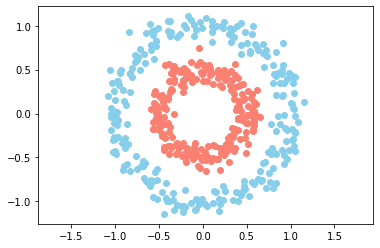

In [14]:
# Crear el dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.08)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0, 1], c='skyblue')
plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1, 1], c='salmon')
plt.axis('equal')
plt.show()

In [15]:
#Clase de la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f                              #Agregamos la función de activación
    self.b = np.random.rand(1, n_neur)      * 2 - 1 #Creamos una matriz de Bias
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1 #Creamos una matriz de pesos

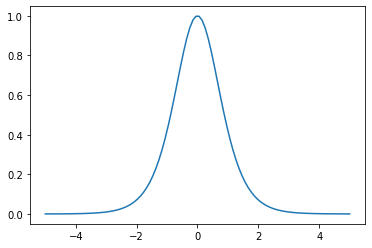

In [52]:
#Funciones de activación

#Función sigmoide
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

#Función tangente hiperbolica
tanh = (lambda x: (2 / (1 + np.e ** (-2*x))) - 1,
        lambda x: 1 / (np.cosh(x) ** 2))

#Función ReLU
relu = lambda x: np.maximum(0, x)

#Variante función ReLU
leaky_relu = (lambda x: np.log(1 + np.e ** x),
              lambda x: 1 / (1 + np.e ** (-x)))

#Prueba para las funciones
_x = np.linspace(-5, 5, 100)
plt.plot(_x, tanh[1](_x))

In [17]:
#Función que crea la red neuronal
def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn

In [18]:
#Función de coste
cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
        lambda Yp, Yr: (Yp - Yr))

In [39]:
#Función de entrenamiento
def train(neural_net, X, Y, cost, lr=0.5, train=True):
  out = [(None, X)] #Lista de outputs para cada capa
  #Hacia adelante
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b # z = xw + b para cada capa
    a = neural_net[l].act_f[0](z) # pasamos los valores por la función de activación
    out.append((z, a)) # Agregamos los outputs a la lista de outputs
  if train:
    deltas = [] #Lista de derivadas parciales
    #Recorremos las capas de fin a inicio
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      if l == len(neural_net) - 1:
        #Calculo del error de la última capa
        deltas.insert(0, cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        #Calculo del error de la capa anterior
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))
      _w = neural_net[l].w
      #Descenso del gradiente
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
  # Regresamos el valor de salida
  return out[-1][1]

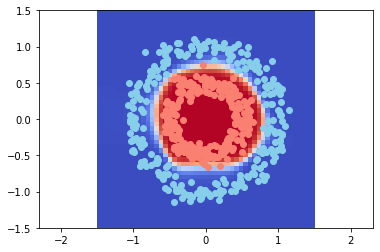

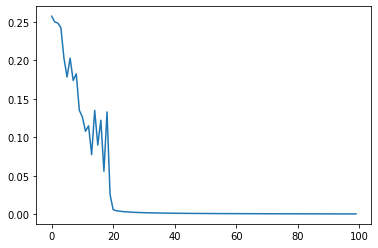

In [58]:
import time
from IPython.display import clear_output

#Creamos array de número de neuronas que tendrá cada capa
topology = [p, 4, 8, 1]

#Creamos la red neuronal
neural_n = create_nn(topology, sigm)

#Almacenamos de cuanto es el coste
loss = []

for i in range(2500):
  # Entrenamos la red
  pY = train(neural_n, X, Y, cost, lr=0.1)
  # Cada 25 iteraciones actualizamos las gráficas
  if i%25 == 0:
    # Mostramos el valor de salida
    print(pY)
    # Vamos guardando los valores de coste
    loss.append(cost[0](pY, Y))

    _x0 = np.linspace(-1.5, 1.5, 50)
    _x1 = np.linspace(-1.5, 1.5, 50)

    _Y = np.zeros((50, 50))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, cost, train=False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.1)